There are n gas stations along a circular route, where the amount of gas at the ith station is gas[i].


You have a car with an unlimited gas tank and it costs cost[i] of gas to travel from the ith station to its next (i + 1)th station. You begin the journey with an empty tank at one of the gas stations.


Given two integer arrays gas and cost, return the starting gas station's index if you can travel around the circuit once in the clockwise direction, otherwise return -1. If there exists a solution, it is guaranteed to be unique.



Example 1:

Input: gas = [1,2,3,4,5], cost = [3,4,5,1,2]

Output: 3

Explanation:

Start at station 3 (index 3) and fill up with 4 unit of gas. Your tank = 0 + 4 = 4

Travel to station 4. Your tank = 4 - 1 + 5 = 8

Travel to station 0. Your tank = 8 - 2 + 1 = 7

Travel to station 1. Your tank = 7 - 3 + 2 = 6

Travel to station 2. Your tank = 6 - 4 + 3 = 5

Travel to station 3. The cost is 5. Your gas is just enough to travel back to station 3.

Therefore, return 3 as the starting index.
Example 2:



Input: gas = [2,3,4], cost = [3,4,3]

Output: -1

Explanation:
You can't start at station 0 or 1, as there is not enough gas to travel to the next station.

Let's start at station 2 and fill up with 4 unit of gas. Your tank = 0 + 4 = 4

Travel to station 0. Your tank = 4 - 3 + 2 = 3

Travel to station 1. Your tank = 3 - 3 + 3 = 3

You cannot travel back to station 2, as it requires 4 unit of gas but you only have 3.

Therefore, you can't travel around the circuit once no matter where you start.


Constraints:

n == gas.length == cost.length
1 <= n <= 105
0 <= gas[i], cost[i] <= 104

In [1]:
!pip install typing
from typing import List

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26303 sha256=05b60031639ce1af8061039518ce8ef3083f64f26d0a8d4fd1e0c788f645172d
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built typing


In [7]:
class Solution:
    def canCompleteCircuit(self, gas: List[int], cost: List[int]) -> int:
      ##starting with when -1 should be returned
      if(sum(gas) < sum(cost)):
        return -1
      ##actual algo
      else:
        ratio_arr = []
        for i in range(len(gas)):
          c = cost[i]
          g = gas[i]
          ratio = c/g
          ratio_arr.append(ratio)

        # We're going to start at the lowest cost to gas ratio, we will attemp to travel through the gas stations from this point.
        #if at any point the traversal becomes not possible, we'll remove the lowest cost to gas ratio from ratio_arr_traverse and try again
        ratio_arr_traverse = ratio_arr.copy()
        found = False
        gas_avail = 0
        loops = 0
        while found == False:
          if loops == 0:
            starting_pnt = ratio_arr_traverse.index(min(ratio_arr_traverse))
          gas_avail = gas_avail + gas[starting_pnt]
          gas_cost = cost[starting_pnt]

          if(starting_pnt + 1 < len(ratio_arr)):
            if(gas_avail - gas_cost >= gas[starting_pnt +1]): ## faulty there will be a list out of bounds here you need to figure out starting_pnt +1 before
              starting_pnt = starting_pnt + 1
              gas_avail = gas_avail - gas_cost
              loops = loops + 1
            else:
              loops = 0
              gas_avail = 0
              ratio_arr_traverse.remove(min(ratio_arr_traverse))

          else:
             starting_pnt = 0
             gas_avail = gas_avail - gas_cost

          if loops == len(gas):
            found = True



In [ ]:
class Solution:
    def canCompleteCircuit(self, gas: List[int], cost: List[int]) -> int:
        if sum(gas) < sum(cost):
            return -1

        curernt_gas = 0
        start = 0
        for i in range(len(gas)):
            curernt_gas += gas[i] - cost[i]
            if curernt_gas < 0:
                curernt_gas = 0
                start = i + 1

        return start

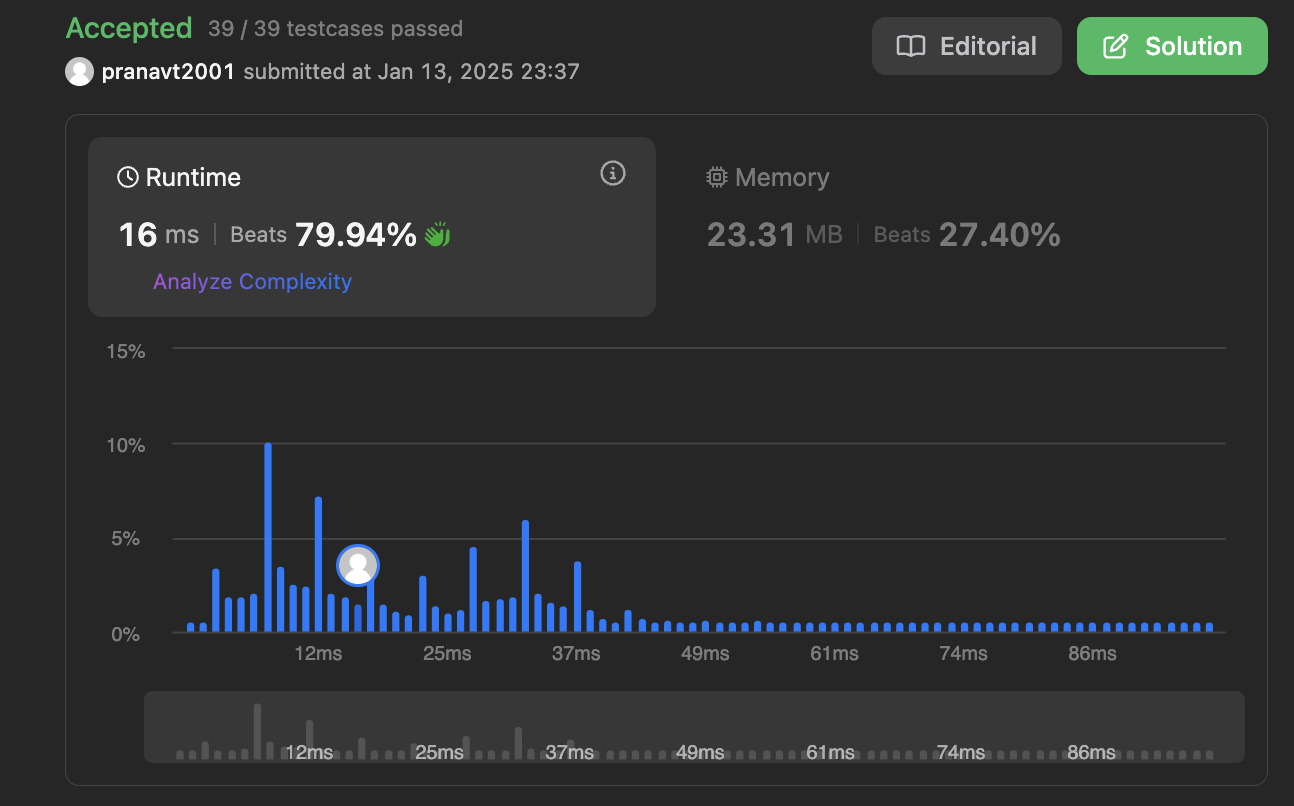

In [3]:
x = [1,2,3,4,5]
x.index(min(x))

0

In [6]:
x = [2,1,4,6,5,0]
x.copy()

[2, 1, 4, 6, 5, 0]